# plot_histogram: 
- Visualize the counts
- plot the data of the experiement

Reference:

https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html#qiskit.visualization.plot_histogram

https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html


In [1]:
from qiskit import QuantumCircuit, Aer,execute, IBMQ
from qiskit.visualization import plot_histogram

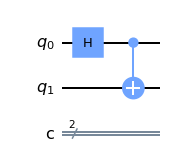

In [2]:
## Sample Program: Bell Circuit

qc=QuantumCircuit(2,2) # 2 qubits and 2 classical bits
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

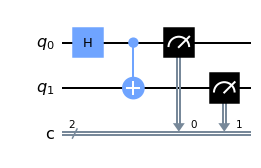

In [3]:
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

In [4]:
backend=Aer.get_backend('qasm_simulator')

job=execute(qc,backend,shots=1024)

result=job.result()

counts=result.get_counts()

print(counts)

{'11': 542, '00': 482}


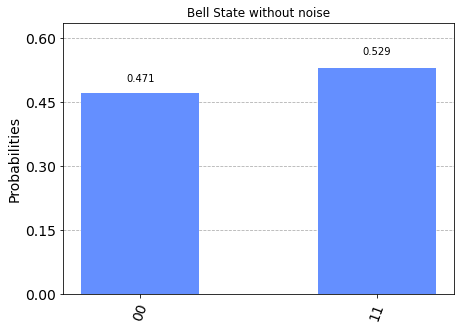

In [5]:
plot_histogram(counts,title="Bell State without noise")

In [6]:
#Load the  account
provider=IBMQ.load_account() 

#List all the available backends for the account
#provider.backends()
#Get the backend
backend=provider.get_backend('ibmq_bogota')

#Execute the circuit on the backend

job=execute(qc,backend,shots=1024)

result=job.result()

counts2=result.get_counts()

print(counts2)

{'00': 492, '01': 43, '10': 43, '11': 446}


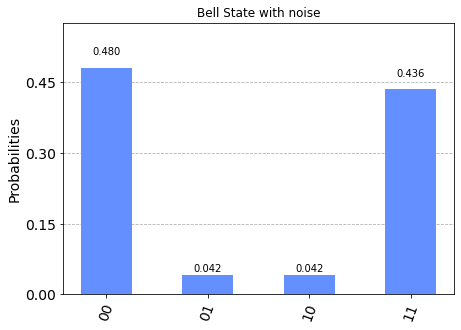

In [7]:
plot_histogram(counts2,title="Bell State with noise")

In [9]:
#Load the  account
provider=IBMQ.load_account() 

#List all the available backends for the account
#provider.backends()
#Get the backend
backend=provider.get_backend('ibmq_belem')

#Execute the circuit on the backend

job=execute(qc,backend,shots=1024)

result=job.result()

counts3=result.get_counts()

print(counts3)

ibmqfactory.load_account:WARNING:2022-01-18 13:27:26,445: Credentials are already in use. The existing account in the session will be replaced.


{'00': 474, '01': 37, '10': 24, '11': 489}


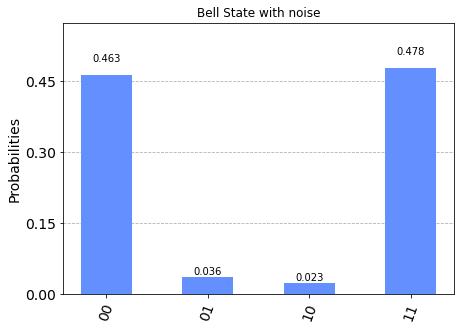

In [10]:
plot_histogram(counts3,title="Bell State with noise")

# Different options:

1. legend: 
- label for the execution
- To plot multiple execution results in the same histogram

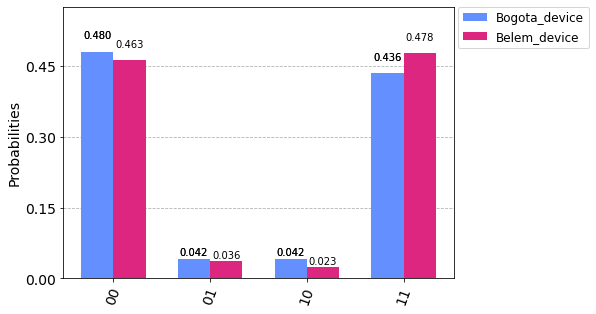

In [12]:
 plot_histogram([counts2,counts3],legend=['Bogota_device', 'Belem_device'])

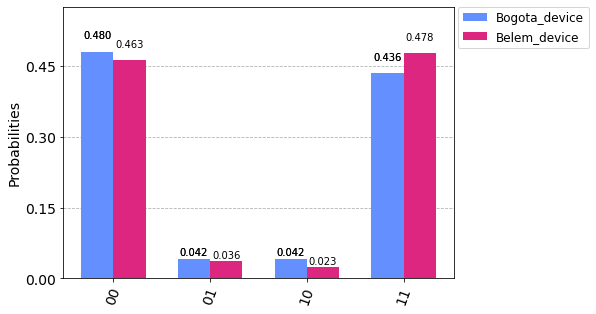

In [14]:
legend=['Bogota_device', 'Belem_device']

plot_histogram([counts2,counts3],legend=legend)

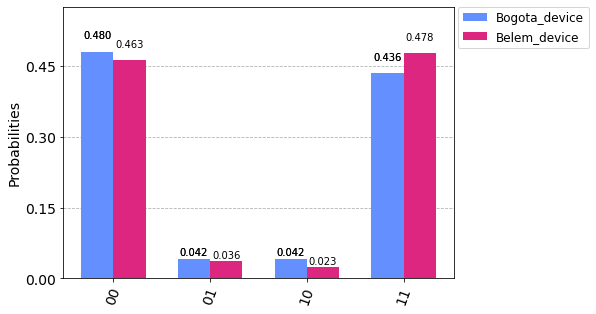

In [15]:
counts_legend='Bogota_device'
counts2_legend ='Belem_device'
plot_histogram([counts2,counts3],legend=[counts_legend,counts2_legend])

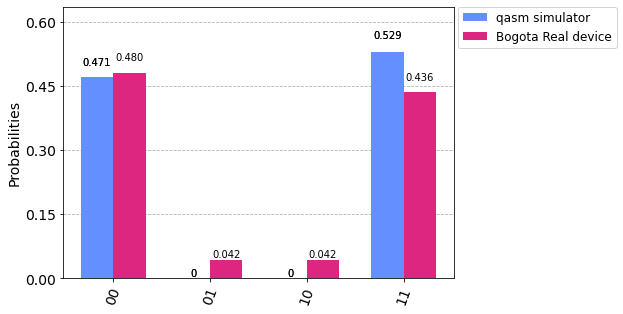

In [18]:
plot_histogram([counts,counts2],legend=['qasm simulator','Bogota Real device'])

In [19]:
counts

{'11': 542, '00': 482}

# NOTE: plot_histogram
    Returns:  matplotlib.Figure for the rendered visualization

### matplotlib.Figure class : methods for the visualization
- display ---------show()
- save    ---------savefig()

In [22]:
hist_plot=plot_histogram([counts,counts2],legend=['qasm simulator','Bogota Real device'])


In [24]:
type(hist_plot)

matplotlib.figure.Figure

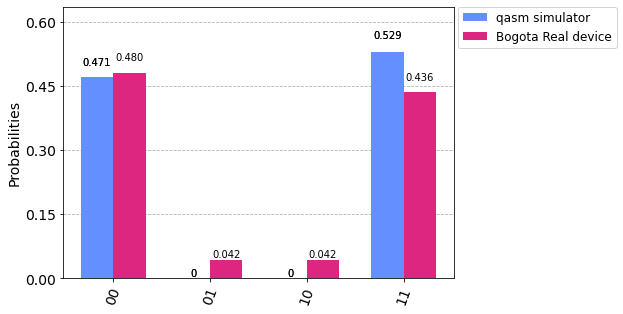

In [25]:
hist_plot

In [32]:
hist_plot.savefig('histPlot.png')

In [42]:
%matplotlib inline
hist_plot.show()

/Users/dimplebavlecha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


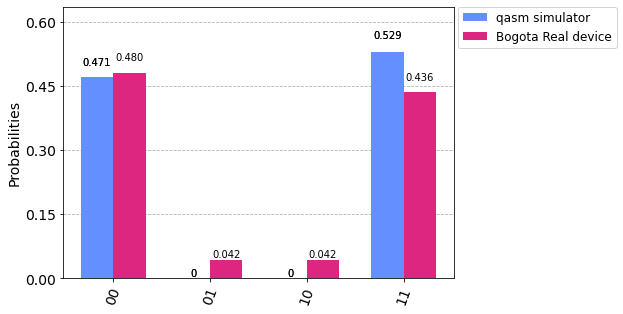

In [43]:
from IPython.display import display
display(hist_plot)